In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import zipfile
from IPython.display import display


 Displaying 5 images for category: Cloudy



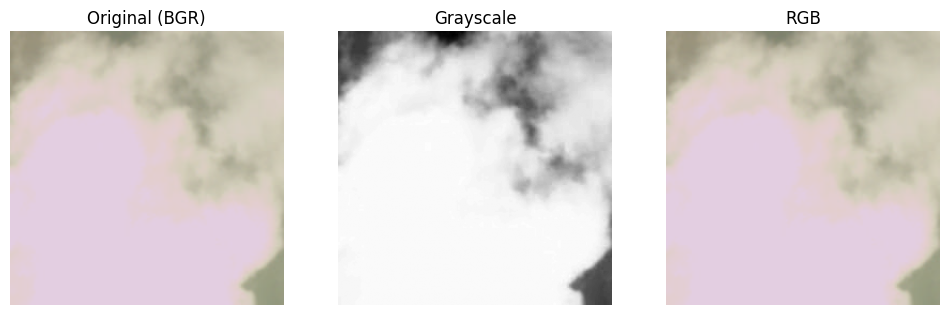

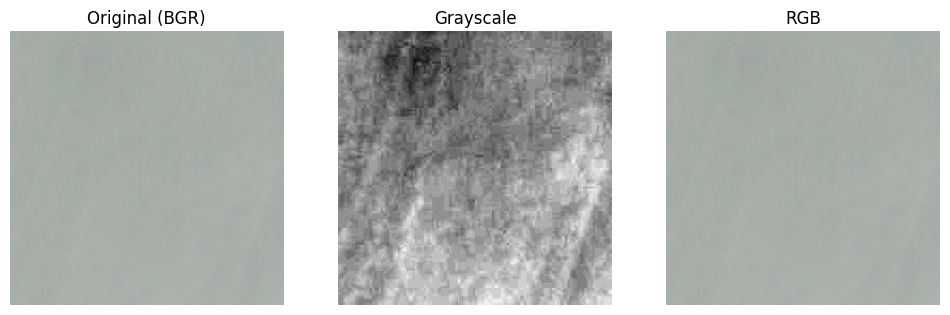

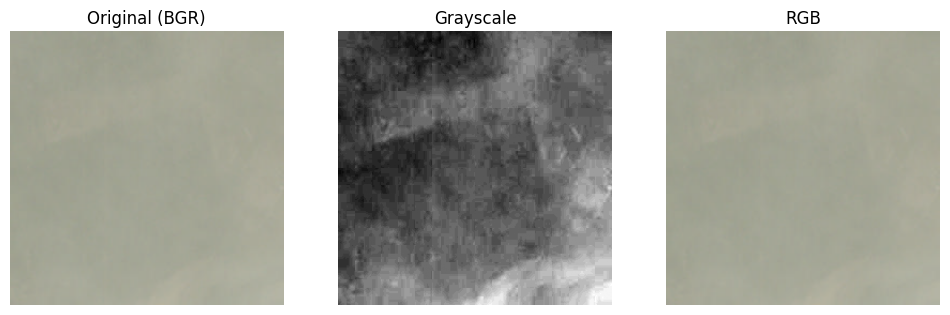

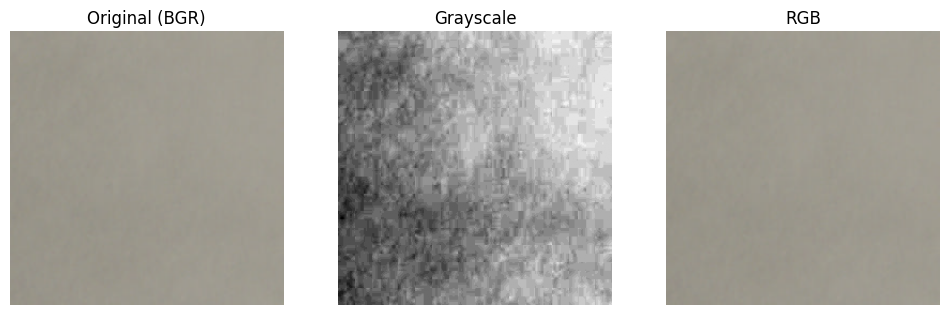

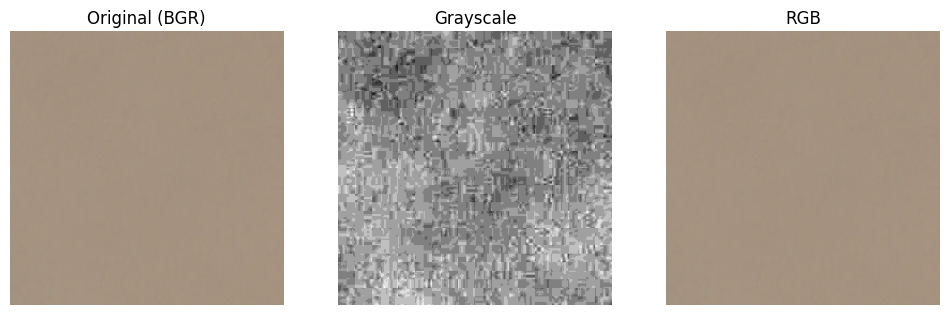


 Displaying 5 images for category: Greeny



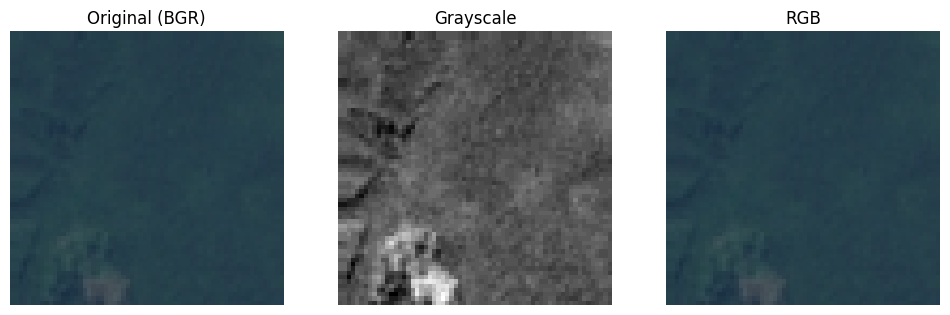

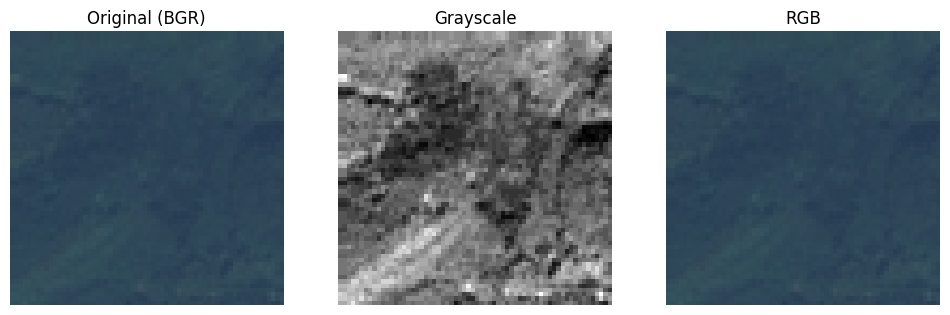

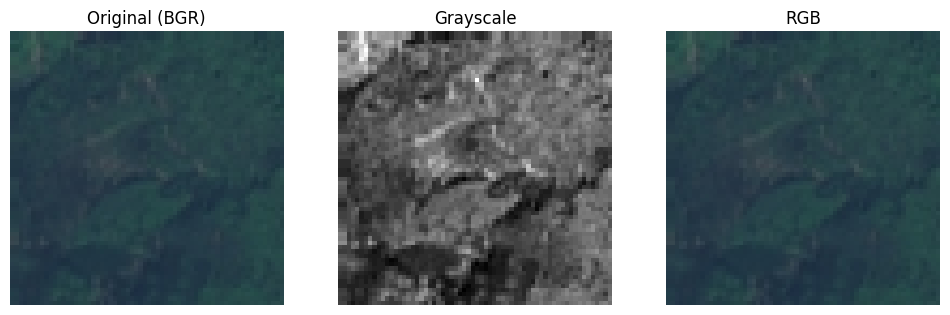

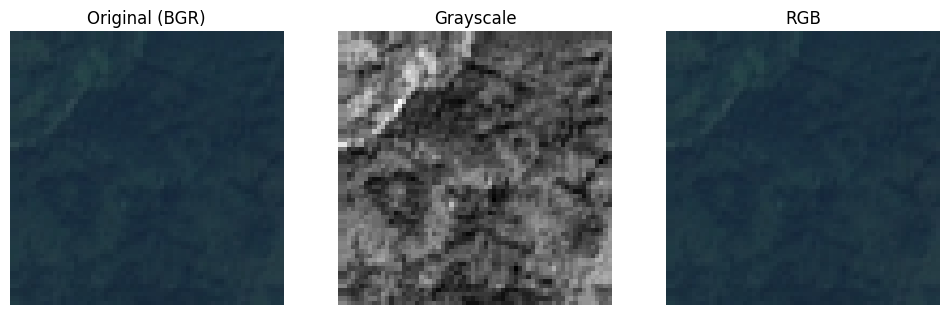

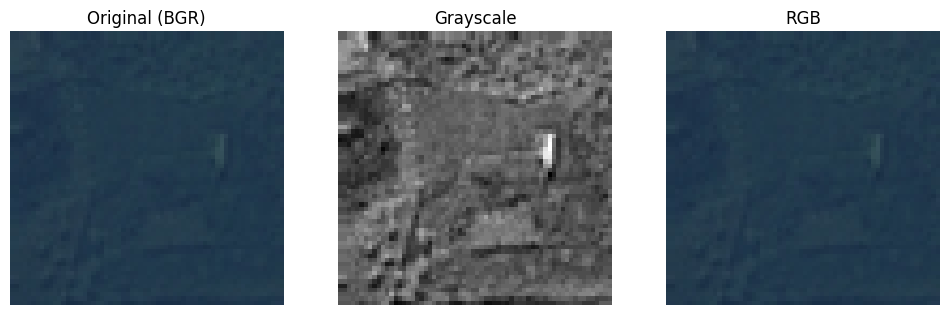


 Displaying 5 images for category: Desert



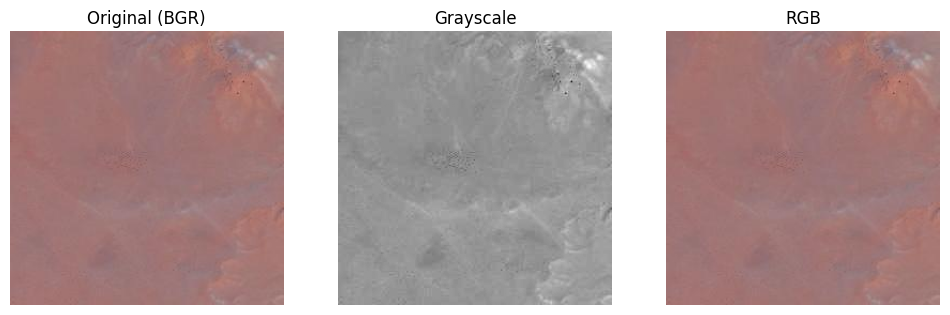

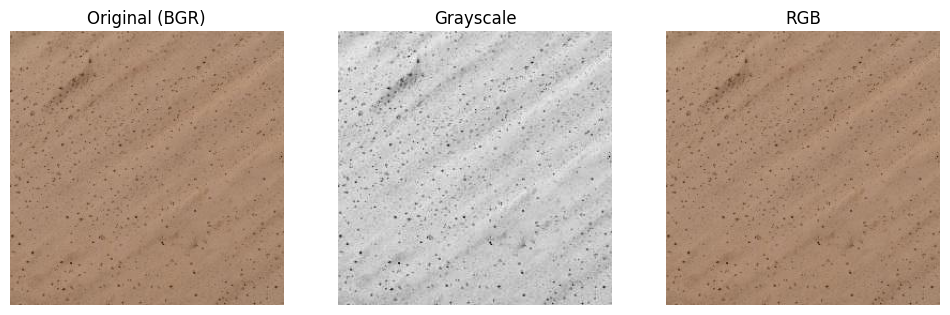

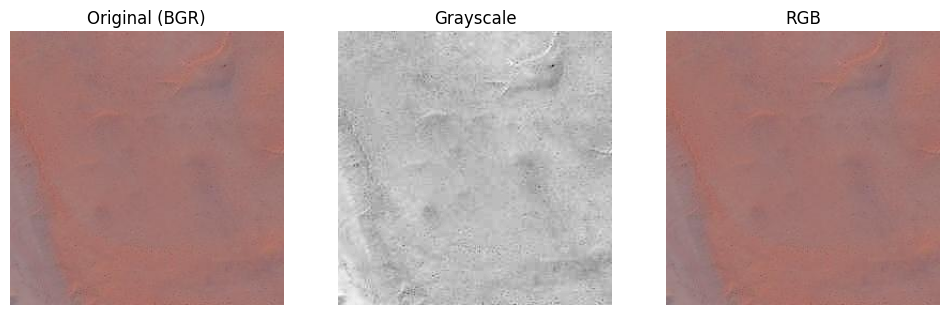

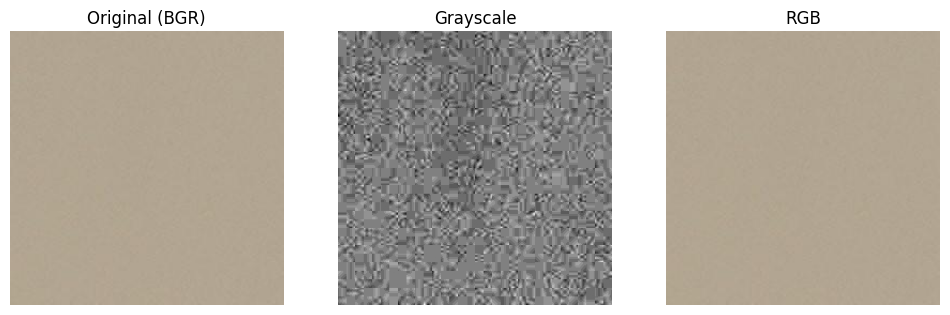

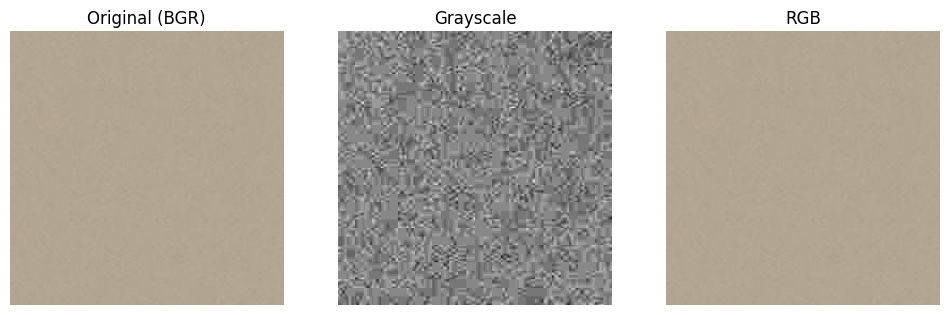


 Displaying 5 images for category: Water



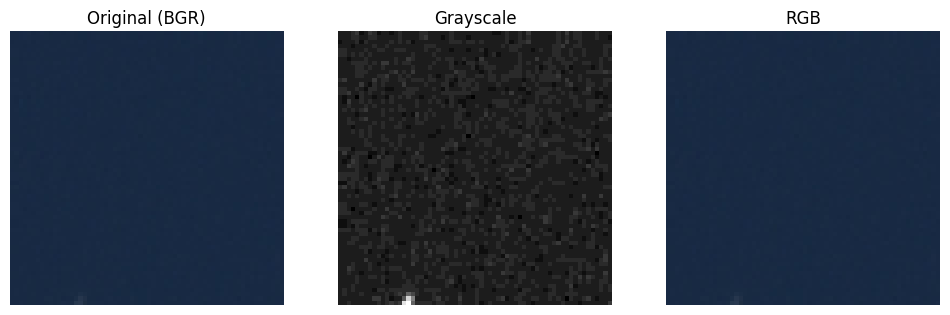

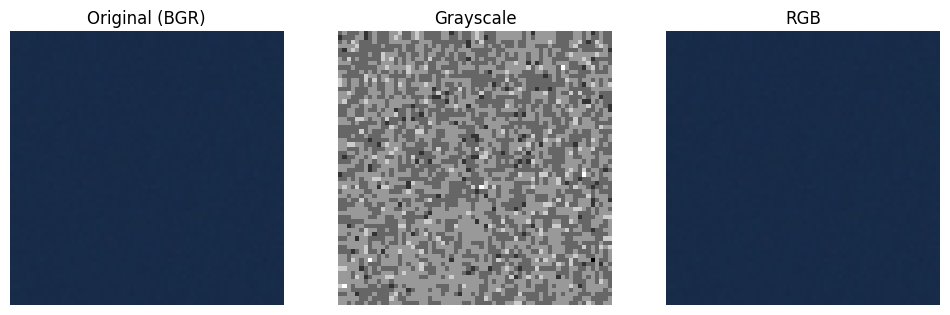

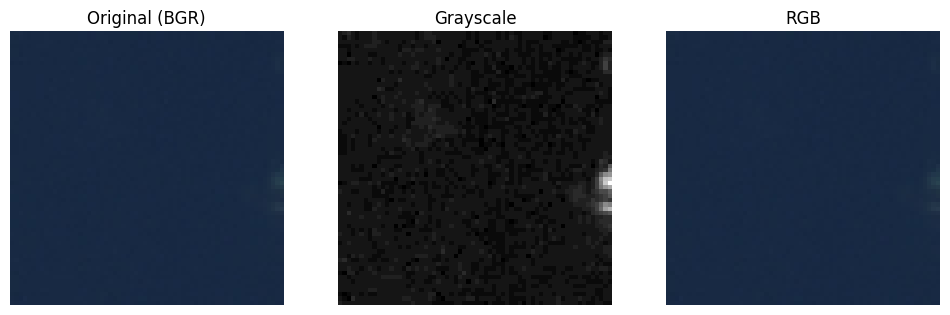

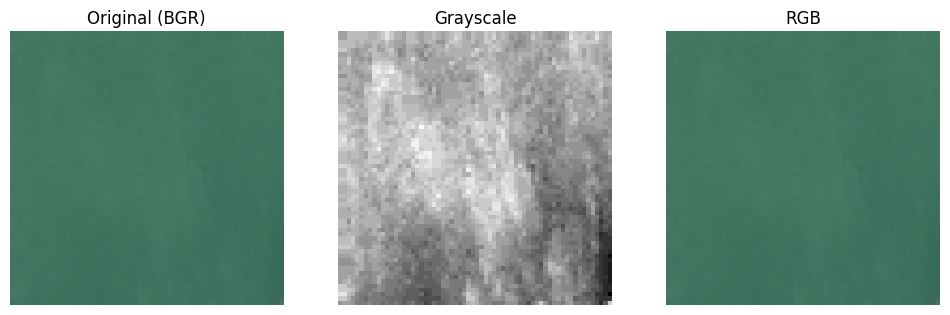

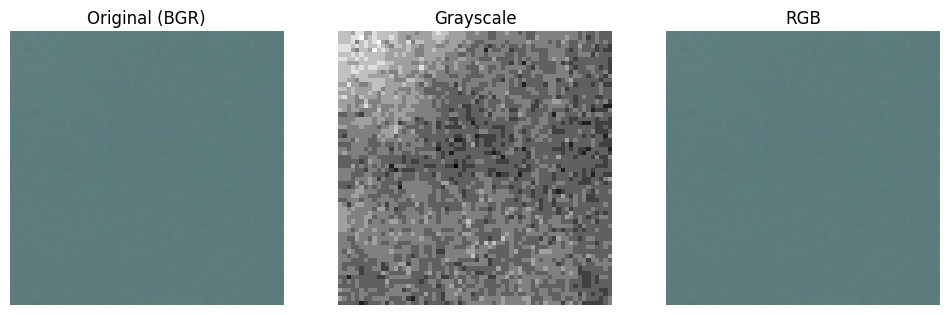

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import zipfile
from IPython.display import display
def convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f" Unable to read image at {image_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def convert_to_rgb(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f" Unable to read image at {image_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def display_images(image_path):
    original = cv2.imread(image_path)
    if original is None:
        return
    gray = convert_to_grayscale(image_path)
    rgb = convert_to_rgb(image_path)

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original (BGR)")
    ax[0].axis("off")

    ax[1].imshow(gray, cmap="gray")
    ax[1].set_title("Grayscale")
    ax[1].axis("off")

    ax[2].imshow(rgb)
    ax[2].set_title("RGB")
    ax[2].axis("off")

    display(fig)
    plt.close(fig)
zip_path = "/content/archive (5).zip"
extract_folder = "/content/temp_images"

try:
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_folder)
except zipfile.BadZipFile:
    print(f"Error: '{zip_path}' is not a valid zip file or is corrupted.")
categories = {"cloudy": [], "greeny": [], "desert": [], "water": []}
root_data_dir = os.path.join(extract_folder, "data")

if not os.path.exists(root_data_dir):
    print(f" Error: 'data' folder not found inside extracted content at {extract_folder}")
else:
    for category in categories:
        class_folder = os.path.join(root_data_dir, category)
        if os.path.isdir(class_folder):
            all_images = sorted([
                os.path.join(class_folder, f)
                for f in os.listdir(class_folder)
                if f.lower().endswith((".jpg", ".png", ".jpeg"))
            ])
            categories[category] = all_images[:5]
for category, images in categories.items():
    print(f"\n Displaying {len(images)} images for category: {category.capitalize()}\n")
    for img_path in images:
        display_images(img_path)


Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.
Training using 2 CPU cores


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.5514 - loss: 0.8804 - val_accuracy: 0.7194 - val_loss: 0.4784
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7214 - loss: 0.5172 - val_accuracy: 0.8108 - val_loss: 0.4163
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7768 - loss: 0.4668 - val_accuracy: 0.8233 - val_loss: 0.4129
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7912 - loss: 0.4512 - val_accuracy: 0.8188 - val_loss: 0.3651
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8408 - loss: 0.3878 - val_accuracy: 0.8197 - val_loss: 0.3745
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8260 - loss: 0.4339 - val_accuracy: 0.8739 - val_loss: 0.2953
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8760 - loss: 0.3404 - val_accuracy: 0.8268 - val_loss: 0.4061
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8521 - loss: 0.3716 - val_a

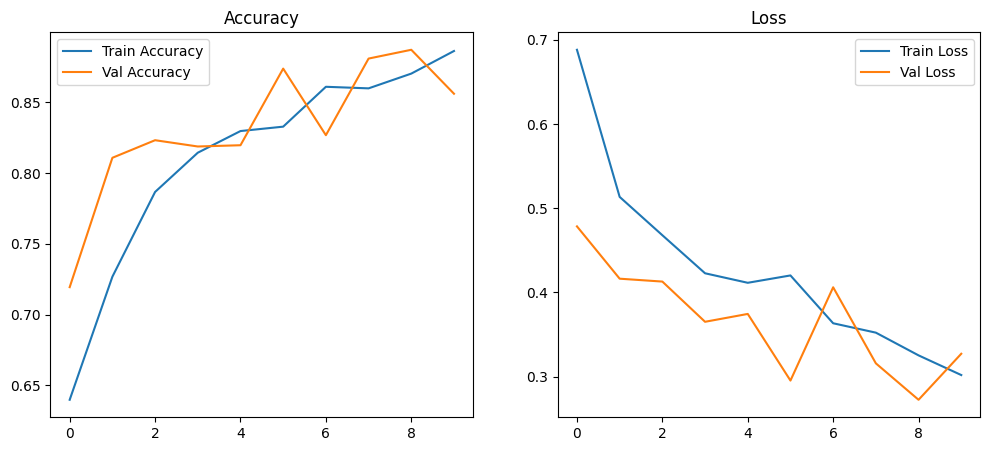

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


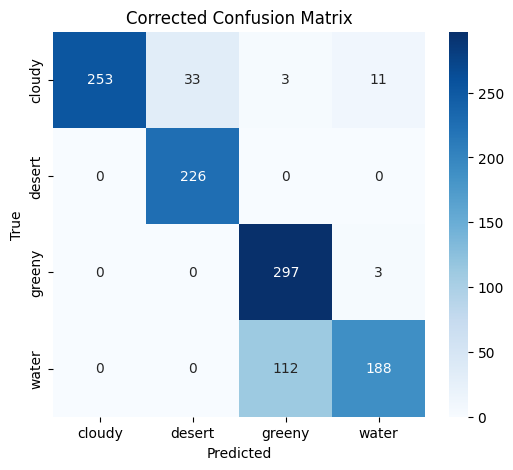


Classification Report:
              precision    recall  f1-score   support

      cloudy       1.00      0.84      0.92       300
      desert       0.87      1.00      0.93       226
      greeny       0.72      0.99      0.83       300
       water       0.93      0.63      0.75       300

    accuracy                           0.86      1126
   macro avg       0.88      0.86      0.86      1126
weighted avg       0.88      0.86      0.85      1126



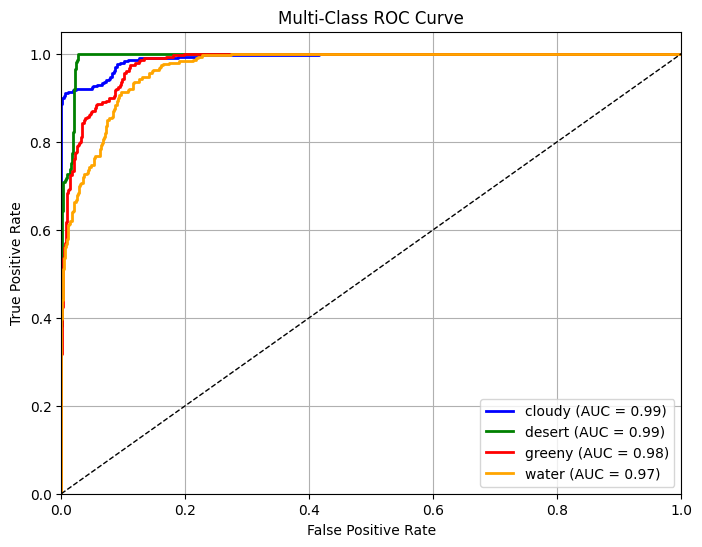

In [ ]:
import zipfile
import os
import shutil
import multiprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from itertools import cycle

zip_path = "/content/archive (5).zip"
extract_to = "/content/temp_images"
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_to)

dataset_path = os.path.join(extract_to, "data")
green_area_path = os.path.join(dataset_path, "green_area")
greeny_path = os.path.join(dataset_path, "greeny")
if os.path.exists(greeny_path):
    shutil.rmtree(greeny_path)
if os.path.exists(green_area_path):
    os.rename(green_area_path, greeny_path)

expected_classes = {'cloudy', 'greeny', 'desert', 'water'}
for folder_name in os.listdir(dataset_path):
    full_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(full_path) and folder_name not in expected_classes:
        shutil.rmtree(full_path)

img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
cpu_cores = multiprocessing.cpu_count()
print(f"Training using {cpu_cores} CPU cores")
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

# Evaluation
val_generator.reset()
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels)
idx_to_label = {v: k for k, v in train_generator.class_indices.items()}
labels_ordered = [idx_to_label[i] for i in range(len(idx_to_label))]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_ordered,
            yticklabels=labels_ordered)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Corrected Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_labels, target_names=labels_ordered))

# ROC Curve
n_classes = len(labels_ordered)
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'orange'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{labels_ordered[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
